# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from scipy.stats import skew, boxcox

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hackathon_ML-Model/AIML Dataset.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA on Dataset

Checking for NULL Values

In [ ]:
df.isnull().values.any()

False

Count number of unique Transaction IDs

In [ ]:
types = list(df.nameOrig.values)

In [ ]:
len(types)

6362620

In [ ]:
unq_type = list(set(types))

len(unq_type)

6353307

Statistical Analysis of Dataset

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df['nameDest'].value_counts().sort_values(ascending=False).head(10)

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

Checking which type of transactions are fraudulent

In [ ]:
print('The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values))) 


The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) 

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [ ]:
print('The type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                          

The type of transactions in which isFlaggedFraud is set: ['TRANSFER']


In [ ]:
dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('Min amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dfFlagged.amount.min())) 

print('Max amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max())) 

Min amount transacted when isFlaggedFraud is set= 353874.22
Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


In [ ]:
dfTransfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [ ]:
print('The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldbalanceDest == 0) & (dfTransfer.newbalanceDest == 0)])))


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


In [ ]:
print('Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max())]))

print('Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
               == dfTransfer.newbalanceOrig)].oldbalanceOrg.max())]))


Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: [353874, 19585040]

Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668]


In [ ]:
print('Have originators of transactions flagged as fraud transacted more than \
once? {}'\
.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig, \
                                    dfNotFlagged.nameDest]))).any()))

print('Have destinations for transactions flagged as fraud initiated\
 other transactions? \
{}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any()))

Have originators of transactions flagged as fraud transacted more than once? False
Have destinations for transactions flagged as fraud initiated other transactions? False


In [ ]:
print('Within fraudulent transactions, are there destinations for TRANSFERS \
that are also originators for CASH_OUTs? {}'.format(\
(dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any()))
dfNotFraud = df.loc[df.isFraud == 0]

Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [ ]:
# 'isFlaggedFraud' column analysis
df_temp_Frag_verification = df[df['isFraud']==1]
print("Total Fraud:",df_temp_Frag_verification.shape[0])
print("\n\n'isFraud'x'isFlaggedFraud' Analysis: \n\n",(df_temp_Frag_verification.groupby(['isFraud','isFlaggedFraud'])['step'].size()))
print("\n'isFlaggedFraud' accuracity:", (df[df['isFlaggedFraud']==1].shape[0]/df_temp_Frag_verification.shape[0]))

Total Fraud: 8213


'isFraud'x'isFlaggedFraud' Analysis: 

 isFraud  isFlaggedFraud
1        0                 8197
         1                   16
Name: step, dtype: int64

'isFlaggedFraud' accuracity: 0.0019481310118105442


# Data Cleaning

In [ ]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

Y = X['isFraud']
# del X['isFraud']

# Eliminate columns irrelevant columns
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) 

In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('The fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('The fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))

The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072
The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


In [ ]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

In [ ]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan

In [ ]:
X.to_csv('/content/drive/MyDrive/Hackathon_ML-Model/filev2.csv')

# Visualisation

## Ploting Data

In [ ]:
raw_data = df

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


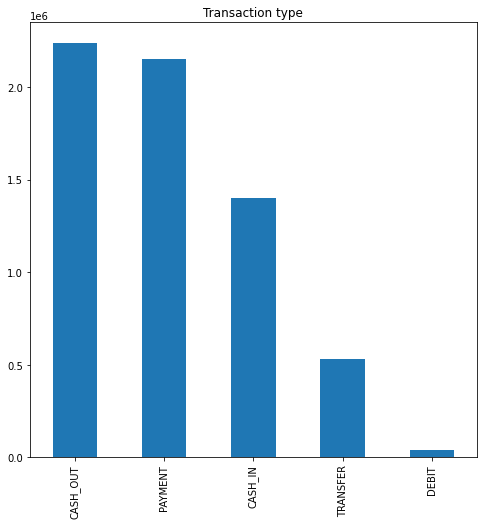

In [ ]:
print(raw_data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
raw_data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

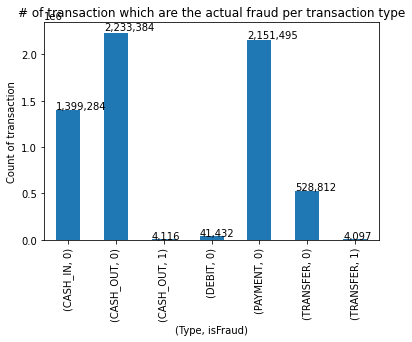

In [ ]:
ax = raw_data.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

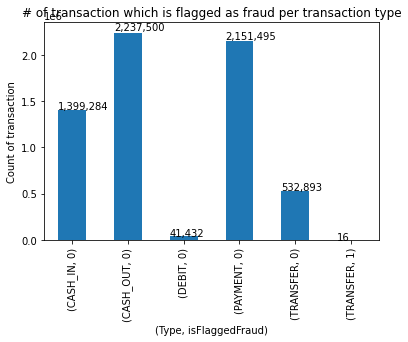

In [ ]:
ax = raw_data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

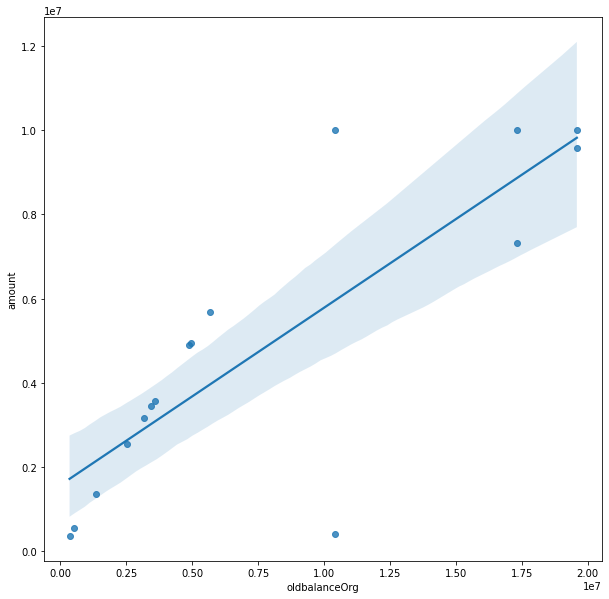

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
tmp = raw_data.loc[(raw_data.type == 'TRANSFER'), :]

a = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :])
plt.show()

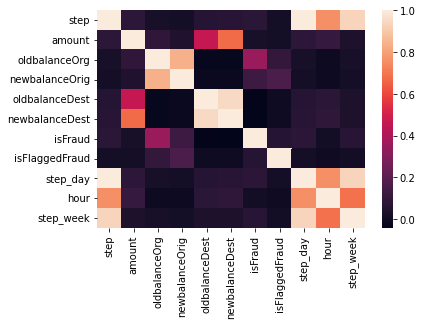

In [ ]:
sns.heatmap(tmp.corr())

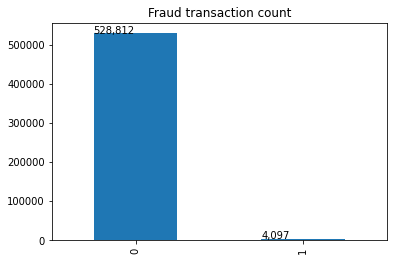

In [ ]:
ax = pd.value_counts(tmp['isFraud'], sort = True).sort_index().plot(kind='bar', title="Fraud transaction count")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
    
plt.show()

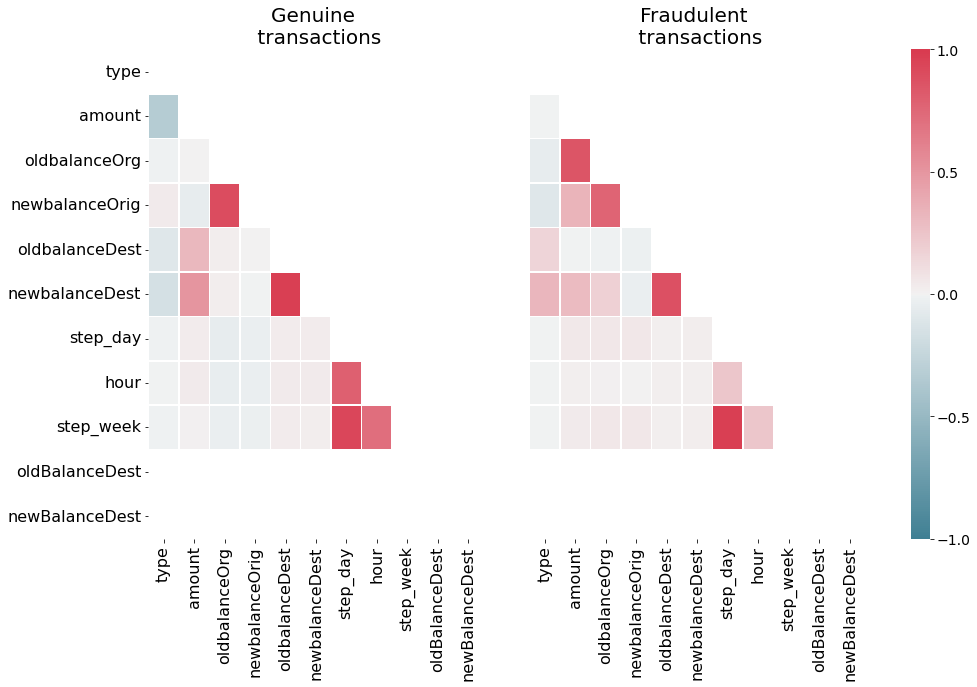

In [ ]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

## Time based analysis of Dataset

Text(0.5, 1.0, '# of transactions by days of the month')

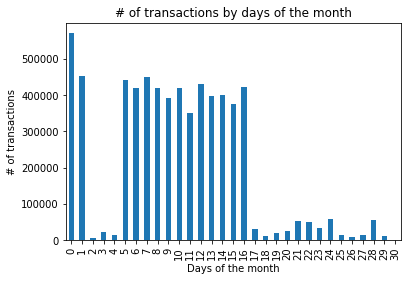

In [ ]:
df['step_day'] = df['step'].map(lambda x: x//24)
df['hour'] = df['step_day'].map(lambda x: x%24)
df['step_week'] = df['step_day'].map(lambda x: x//7)
df['step_day'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of transactions by days of the month")

Text(0.5, 1.0, '# of transactions by hours of the day')

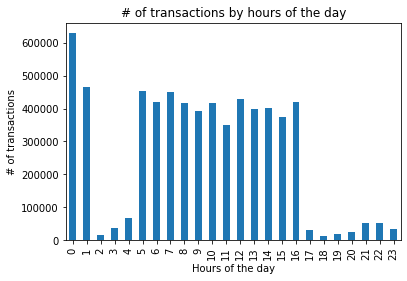

In [ ]:
df['hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of transactions by hours of the day")

Text(0.5, 1.0, '# of transactions by weeks of the month')

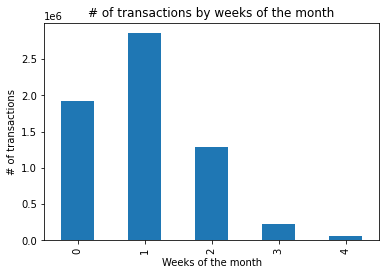

In [ ]:
df['step_week'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of transactions by weeks of the month")

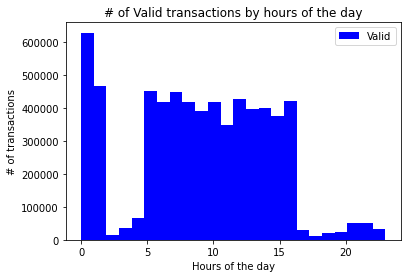

In [ ]:
df[(df.isFraud == 0)]['hour'].plot.hist(bins=24,color='blue',label='Valid')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by hours of the day")
plt.legend()
plt.show()

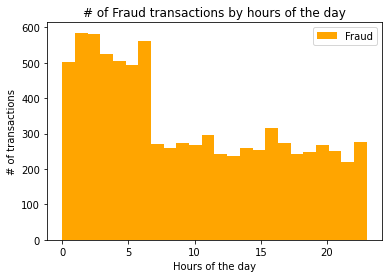

In [ ]:
df[(df.isFraud == 1)]['hour'].plot.hist(bins=24,color='orange',label='Fraud')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by hours of the day")
plt.legend()
plt.show()

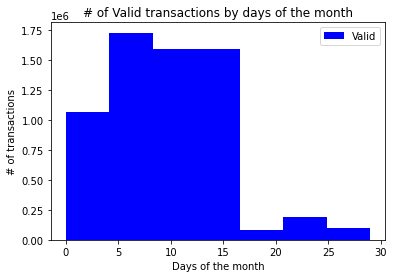

In [ ]:
df[(df.isFraud == 0)]['step_day'].plot.hist(bins=7,color='blue',label='Valid')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by days of the month")
plt.legend()
plt.show()

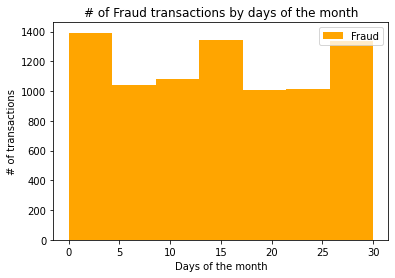

In [ ]:
fig, ax = plt.subplots() #1,2, figsize=(7,9)
df[(df.isFraud == 1)]['step_day'].plot.hist(bins=7,color='orange',label='Fraud')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by days of the month")
plt.legend()
plt.show()

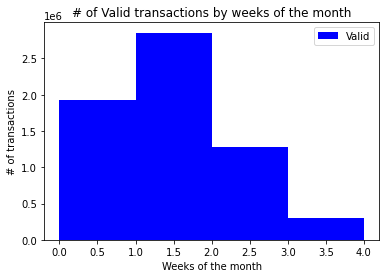

In [ ]:
df[(df.isFraud == 0)]['step_week'].plot.hist(bins=4,color='blue',label='Valid')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by weeks of the month")
plt.legend()
plt.show()

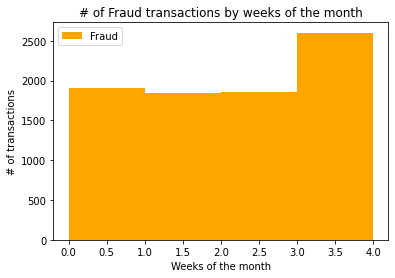

In [ ]:
df[(df.isFraud == 1)]['step_week'].plot.hist(bins=4,color='orange',label='Fraud')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by weeks of the month")
plt.legend()
plt.show()

# Insights

1. There are no missing values
2. There are just over 6 million observations & 11 variables
3. Most transactions involve amounts less than 1 million euros.
4. Out of 5 transaction types, fraud occurs only in two of them, namely CASH_OUT & TRANSFER
5. the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs.
6. Only 16 values out 6 million have been flagged isFlaggedfraud.. Making it redundant in the dataset
7. The old is identical to the new balance in the origin and destination accounts, for every TRANSFER where isFlaggedFraud is set.
8. It turns out that originators of transactions that have isFlaggedFraud set have transacted only once.
9. Merchants are only present in destination accounts for all PAYMENTS.



## Evaluation of fraud transactions

1. Our Fraud Detection Model Detects it to be Fraud
2. Immediately after a transfer, cash out is done of amount larger than 200,000 or more than 75% of bank balance.